 # **Goal of this project**

I am attempting to better my data science skills and will hope to learn from this project
1. Cleaning data with python
2. Exploring data with python
3. Performing feature engineering with python
4. Preprocessing data for machine learning models
5. Build machine learning models
6. Compiling model results

In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


I will start by reading in the training and testing data sets. I will work with the training set for my analysis and building the models, and then I will make predictions based off of the test set for my submission. If a passenger survived then 0 = No, and 1 = Yes.

In [162]:
set_train = pd.read_csv('/kaggle/input/titanic/train.csv')
set_test = pd.read_csv('/kaggle/input/titanic/test.csv')

set_train['train_test'] = 1
set_test['train_test'] = 0
set_test['Survived'] = np.NaN

train_and_test_data = pd.concat([set_train,set_test])

 # **Data Exploration and Analysis**

Throughout this section I will understand the types of data I am working with, the number of null values per each column, some descriptive statistics about the data, and perform some intial analysis of the data set.

In [163]:
#Get a visual of the training set dataframe
set_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  train_test  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           1  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           1  
4      0            373450   8.0500   NaN        S           1

In [164]:
#Explore what the data looks like (data types, null values, and columns)
set_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [165]:
#Get additional information on the quantitative data (mean, std, min, max, and quartiles)
set_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  train_test  
count  891.000000  891.000000       891.0  
mean     0.381594   32.204208         1.0  
std      0.806057   49.693429         0.0  
min      0.000000    0.000000         1.0  
25%      0.000000    7.910400         1.0  
50%      0.000000   14.454200         1.0  
75%      0.000000   31.000000         1.0  
max      6.000000  512.329200         1.0

Text(0.5, 1.0, 'Distribution of Age')

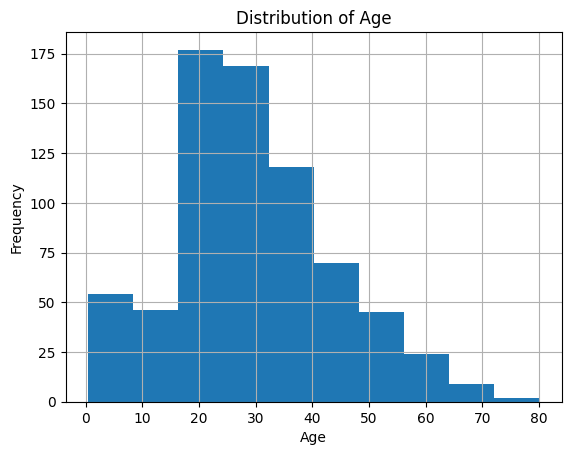

In [166]:
# plot a histogram of the age column
set_train['Age'].hist()

# add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of fare')

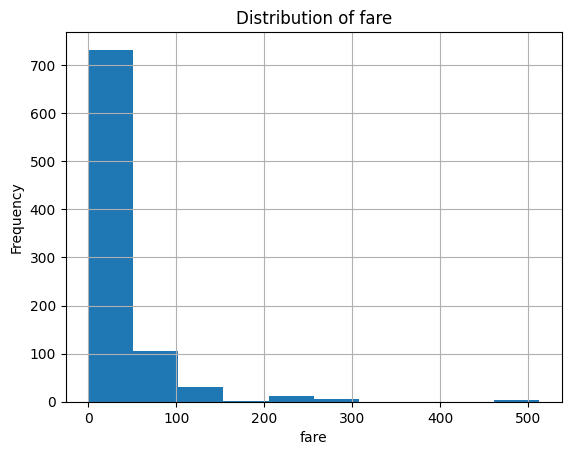

In [167]:
# plot a histogram of the fare column
set_train['Fare'].hist()

# add labels and title
plt.xlabel('fare')
plt.ylabel('Frequency')
plt.title('Distribution of fare')

Text(0.5, 1.0, 'Distribution of Number of Siblings / Spouses')

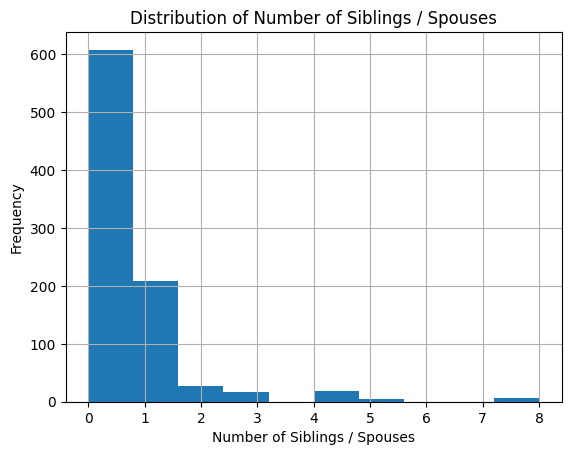

In [168]:
# plot a histogram of the number of siblings / spouses aboard the Titanic
set_train['SibSp'].hist()

# add labels and title
plt.xlabel('Number of Siblings / Spouses')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Siblings / Spouses')

In [169]:
#Small exploration on survival rates by mean of numeric values 
pd.pivot_table(set_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'], aggfunc='mean')

Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684

In [170]:
# Comparing survival rates among ticket classes, 1 = 1st, 2 = 2nd, 3 = 3rd
print(pd.pivot_table(set_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


In [171]:
# Comparing survival rates among gender
print(pd.pivot_table(set_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))

Sex       female  male
Survived              
0             81   468
1            233   109


In [172]:
# Comparing survival rates among port of embarkment, C = Cherbourg, Q = Queenstown, S = Southampton
print(pd.pivot_table(set_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# **Feature Engineering**

The first feature I will look at is **cabin**. There are many cabins by letter and number. I need to find a way to put this into a readable format for my model to analyze.

In [173]:
print(set_train['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [174]:
# New column to determine the number of cabins a person was in
set_train['cabin_multiple'] = set_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
print(set_train['cabin_multiple'].value_counts())

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


In [175]:
print(pd.pivot_table(set_train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count') )

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0


In [176]:
#New column to determine the cabin letter someone was in, null values (n) will be their own category

set_train['cabin_letter'] = set_train.Cabin.apply(lambda x: str(x)[0])
print(set_train['cabin_letter'])

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_letter, Length: 891, dtype: object


In [177]:
print(pd.pivot_table(set_train,index='Survived',columns='cabin_letter', values = 'Ticket', aggfunc='count'))

cabin_letter    A     B     C     D     E    F    G    T      n
Survived                                                       
0             8.0  12.0  24.0   8.0   8.0  5.0  2.0  1.0  481.0
1             7.0  35.0  35.0  25.0  24.0  8.0  2.0  NaN  206.0


The second feature I will look at is **person's title**. 

In [178]:
#Grab title (Mr, Mrs, Miss, etc)
set_train['person_title'] = set_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(set_train['person_title'])

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: person_title, Length: 891, dtype: object


In [179]:
#Understand frequency of titles
print(set_train['person_title'].value_counts() )

person_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


The third feature I will look at is **ticket**. 

In [180]:
#Understand different ticket formats
print(set_train['Ticket'].unique())

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879'
 '2680' '1601' '348123' '349208' '374746' '248738' '364516' '345767'
 '345779' '330932' '113059' 'SO/C 14885' '3101278' 'W./C. 6608'
 'SOTON/OQ 392086' '343275' '343276' '347466' 'W.E.P. 5734' 'C.A. 2315'
 '364500' '374910' 'PC 17754' 'PC 17759' '231919' '244367' '349245'
 '349215' '35281' '

In [181]:
#Get tickets with only numbers as a way to split ticket types 
set_train['ticket_number_only'] = set_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
print(set_train['ticket_number_only'])

0      0
1      0
2      0
3      1
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: ticket_number_only, Length: 891, dtype: int64


In [182]:
#Survival rate of individuals with tickets that only have numbers vs tickets with prefixes
pd.pivot_table(set_train,index='Survived',columns='ticket_number_only', values = 'Ticket', aggfunc='count')

ticket_number_only    0    1
Survived                    
0                   142  407
1                    88  254

In [183]:
#Get ticket prefix
set_train['ticket_prefix'] = set_train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
print(set_train['ticket_prefix'].unique())

['a5' 'pc' 'stono2' 0 'pp' 'ca' 'scparis' 'sca4' 'a4' 'sp' 'soc' 'wc'
 'sotonoq' 'wep' 'c' 'sop' 'fa' 'fcc' 'swpp' 'scow' 'ppp' 'sc' 'scah' 'as'
 'scahbasle' 'sopp' 'fc' 'sotono2' 'casoton']


In [184]:
#Survival rate of individuals with tickets that contain letters and the survival rate between those letter types
pd.pivot_table(set_train,index='Survived',columns='ticket_prefix', values = 'Ticket', aggfunc='count')

ticket_prefix      0   a4    a5   as    c    ca  casoton   fa   fc  fcc  ...  \
Survived                                                                 ...   
0              410.0  7.0  19.0  1.0  3.0  27.0      1.0  1.0  1.0  1.0  ...   
1              255.0  NaN   2.0  NaN  2.0  14.0      NaN  NaN  NaN  4.0  ...   

ticket_prefix  soc  sop  sopp  sotono2  sotonoq   sp  stono2  swpp   wc  wep  
Survived                                                                      
0              5.0  1.0   3.0      2.0     13.0  1.0    10.0   NaN  9.0  2.0  
1              1.0  NaN   NaN      NaN      2.0  NaN     8.0   2.0  1.0  1.0  

[2 rows x 29 columns]

# **Data Preprocessing**

In [185]:
#Re create above columns for traning and test data sets combine
train_and_test_data['cabin_multiple'] = train_and_test_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
train_and_test_data['cabin_letter'] = train_and_test_data.Cabin.apply(lambda x: str(x)[0])

train_and_test_data['person_title'] = train_and_test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

train_and_test_data['ticket_number_only'] = train_and_test_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
train_and_test_data['ticket_prefix'] = train_and_test_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [186]:
#Using the median to replace null values in the age data (used median to calculate null values because the age data set is not normally distributed, mean != median)
train_and_test_data.Age = train_and_test_data.Age.fillna(set_train.Age.median())

In [187]:
#Using the median to replace null values in the fare data (used median to calculate null values because the fare data set is not normally distributed, mean != median)
train_and_test_data.Fare = train_and_test_data.Fare.fillna(set_train.Fare.median())

In [188]:
#Dropped the only 2 rows where Emabarked values were null
train_and_test_data.dropna(subset=['Embarked'],inplace = True)

In [189]:
#Create dummy variables to use in machine learning model because the model can ready 1s and 0s but cannot use text
all_dummies = pd.get_dummies(train_and_test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','cabin_letter','cabin_multiple','ticket_number_only','person_title','ticket_prefix','train_test']])
print(all_dummies)

     Pclass   Age  SibSp  Parch      Fare  cabin_multiple  ticket_number_only  \
0         3  22.0      1      0    7.2500               0                   0   
1         1  38.0      1      0   71.2833               1                   0   
2         3  26.0      0      0    7.9250               0                   0   
3         1  35.0      1      0   53.1000               1                   1   
4         3  35.0      0      0    8.0500               0                   1   
..      ...   ...    ...    ...       ...             ...                 ...   
413       3  28.0      0      0    8.0500               0                   0   
414       1  39.0      0      0  108.9000               1                   0   
415       3  38.5      0      0    7.2500               0                   0   
416       3  28.0      0      0    8.0500               0                   1   
417       3  28.0      1      1   22.3583               0                   1   

     train_test  Sex_female

In [190]:
#Get training data that will be used to train model and the test set that the model will be tested on
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)
print(X_test)

     Pclass   Age  SibSp  Parch      Fare  cabin_multiple  ticket_number_only  \
0         3  34.5      0      0    7.8292               0                   1   
1         3  47.0      1      0    7.0000               0                   1   
2         2  62.0      0      0    9.6875               0                   1   
3         3  27.0      0      0    8.6625               0                   1   
4         3  22.0      1      1   12.2875               0                   1   
..      ...   ...    ...    ...       ...             ...                 ...   
413       3  28.0      0      0    8.0500               0                   0   
414       1  39.0      0      0  108.9000               1                   0   
415       3  38.5      0      0    7.2500               0                   0   
416       3  28.0      0      0    8.0500               0                   1   
417       3  28.0      1      1   22.3583               0                   1   

     Sex_female  Sex_male  

In [191]:
#Get output of the training data above for model accuracy
y_train = train_and_test_data[train_and_test_data.train_test==1].Survived
print(y_train)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 889, dtype: float64


In [192]:
# Scale data to have coloumns not overly influence model 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','Fare']]= scaler.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','Fare']])
print(all_dummies_scaled)

     Pclass       Age     SibSp     Parch      Fare  cabin_multiple  \
0         3 -0.580261  0.480272 -0.445407 -0.501839               0   
1         1  0.662297  0.480272 -0.445407  0.736023               1   
2         3 -0.269621 -0.479537 -0.445407 -0.488790               0   
3         1  0.429318  0.480272 -0.445407  0.384512               1   
4         3  0.429318 -0.479537 -0.445407 -0.486373               0   
..      ...       ...       ...       ...       ...             ...   
413       3 -0.114301 -0.479537 -0.445407 -0.486373               0   
414       1  0.739957 -0.479537 -0.445407  1.463211               1   
415       3  0.701127 -0.479537 -0.445407 -0.501839               0   
416       3 -0.114301 -0.479537 -0.445407 -0.486373               0   
417       3 -0.114301  0.480272  0.709647 -0.209772               0   

     ticket_number_only  train_test  Sex_female  Sex_male  ...  \
0                     0           1       False      True  ...   
1              

In [193]:
#Get scaled training data and the test set to test model on
X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

# **Model Building**

The 3 models I will look at in this project are below:

1. Naive Bayes
2. Logistic Regression 
3. Decision Tree

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [195]:
#Using Gaussian Naive Bayes classification
gaus_NB = GaussianNB()
cross_val = cross_val_score(gaus_NB,X_train_scaled,y_train,cv=5)
print(cross_val)
print(cross_val.mean())

[0.47191011 0.45505618 0.41573034 0.42696629 0.44067797]
0.4420681774900019


In [196]:
#Using logistic regression classification
lg_reg = LogisticRegression(max_iter = 2000)
cross_val = cross_val_score(lg_reg,X_train_scaled,y_train,cv=5)
print(cross_val)
print(cross_val.mean())

[0.83146067 0.82022472 0.79775281 0.80337079 0.85310734]
0.8211832666793628


In [197]:
#Using decision tree classification 
dec_tree = tree.DecisionTreeClassifier(random_state = 1)
cross_val = cross_val_score(dec_tree,X_train_scaled,y_train,cv=5)
print(cross_val)
print(cross_val.mean())

[0.75842697 0.79213483 0.82022472 0.78089888 0.83615819]
0.7975687170697645


# **Submission**

For the submission I will utilize the logistic regression classification because it gave me an accuray of 82% highest of the 3 models I chose to compare for this project.

In [198]:
#Fit model for submission
lg_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [200]:
#Create prediction based off test set and submit results
y_pred = lg_reg.predict(X_test_scaled)
submission = {'PassengerId': set_test.PassengerId, 'Survived': y_pred}
submission = pd.DataFrame(data=submission)
submission.to_csv('submission.csv', index=False)

OSError: [Errno 30] Read-only file system: 'submission.csv'